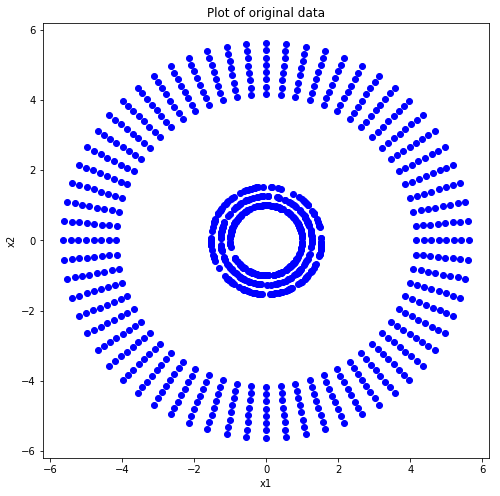

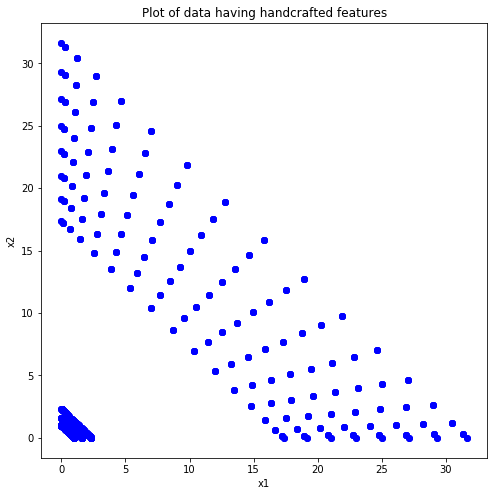

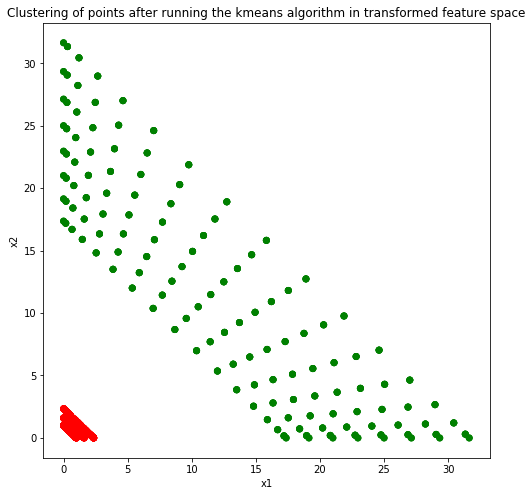

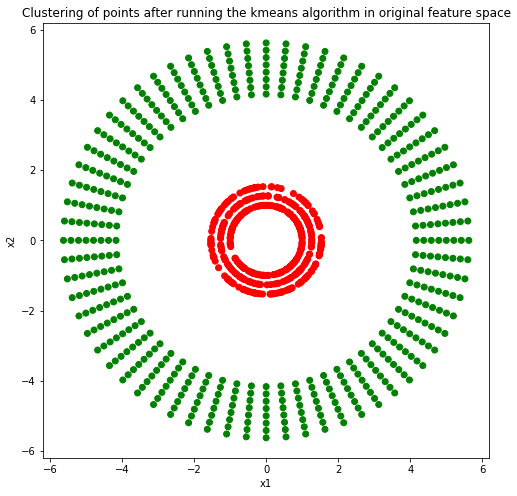

In [3]:
from __future__ import division, print_function, unicode_literals
from sklearn import metrics
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance

#loading data
kmdata=np.loadtxt(fname='kmeans_data.txt',dtype=float,delimiter=None)

#plotting original data
fig = plt.figure(figsize=(8,8))
matplotlib.pyplot.scatter(kmdata[:,0], kmdata[:,1], c='blue')
plt.title('Plot of original data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

skmdata=np.square(kmdata)#Handcrafted Feature Matrix

#Plotting the data in transformed space
fig = plt.figure(figsize=(8,8))
plt.title('Plot of data having handcrafted features')
plt.xlabel('x1')
plt.ylabel('x2')
matplotlib.pyplot.scatter(skmdata[:,0], skmdata[:,1], c='blue')
plt.show()

#kmeans
c1=skmdata[0,:]
c2=skmdata[1,:]
skmdatadf=pd.DataFrame(skmdata)#skmdatadf stores transformed data along with their cluster id
z=np.zeros(skmdata.shape[0])
skmdatadf[2]=z
d1=skmdata[0,:]
d2=skmdata[1,:]
c1=[0,0]
c2=[0,0]

while not(np.array_equal(c1,d1)) or not(np.array_equal(c2,d2)):
    c1=d1#cluster 1 centre
    c2=d2#cluster 2 centre
    for i in range(0,skmdata.shape[0]):
        if distance.euclidean(skmdata[i,:],c1)<distance.euclidean(skmdata[i,:],c2):
            skmdatadf.loc[i,2]=1
        else:
            skmdatadf.loc[i,2]=2
    #compute new centres
    mn=skmdatadf.groupby([2]).mean()
    d1=list(mn.loc[1,:])
    d2=list(mn.loc[2,:])
    
#plotting the result
fig = plt.figure(figsize=(8,8))
colors = ['red','green']
matplotlib.pyplot.scatter(skmdatadf[0], skmdatadf[1], c=skmdatadf[2], cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Clustering of points after running the kmeans algorithm in transformed feature space')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#plotting the data in the original feature space
fig = plt.figure(figsize=(8,8))
colors = ['red','green']
matplotlib.pyplot.scatter(kmdata[:,0], kmdata[:,1], c=skmdatadf[2], cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Clustering of points after running the kmeans algorithm in original feature space')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()